# Cluster Analysis - segmentation: Gaussian Mixture Model

Gaussian Mixture Model is a probabilistc method for clustering. A subject or object is assigned to a segment and you can see its probability of belonging to any cluster. The probabilities allow to better evaluate edge cases.

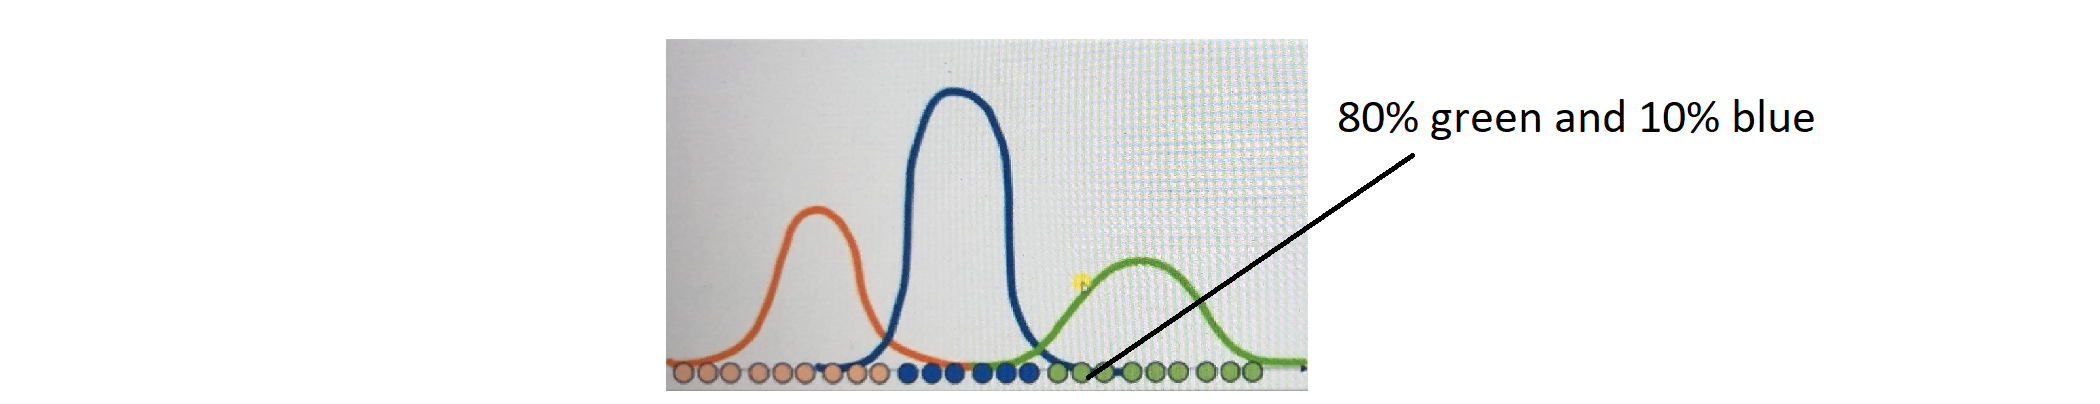

You can use this techinque to segment clients, countries, and so on. It is better to use than traditional clustering algoriths like Kmeans (pro: faster, clusters adapt to date. Cons:poor at dealing low amount of data points, need to standarize data, tend to overfit)

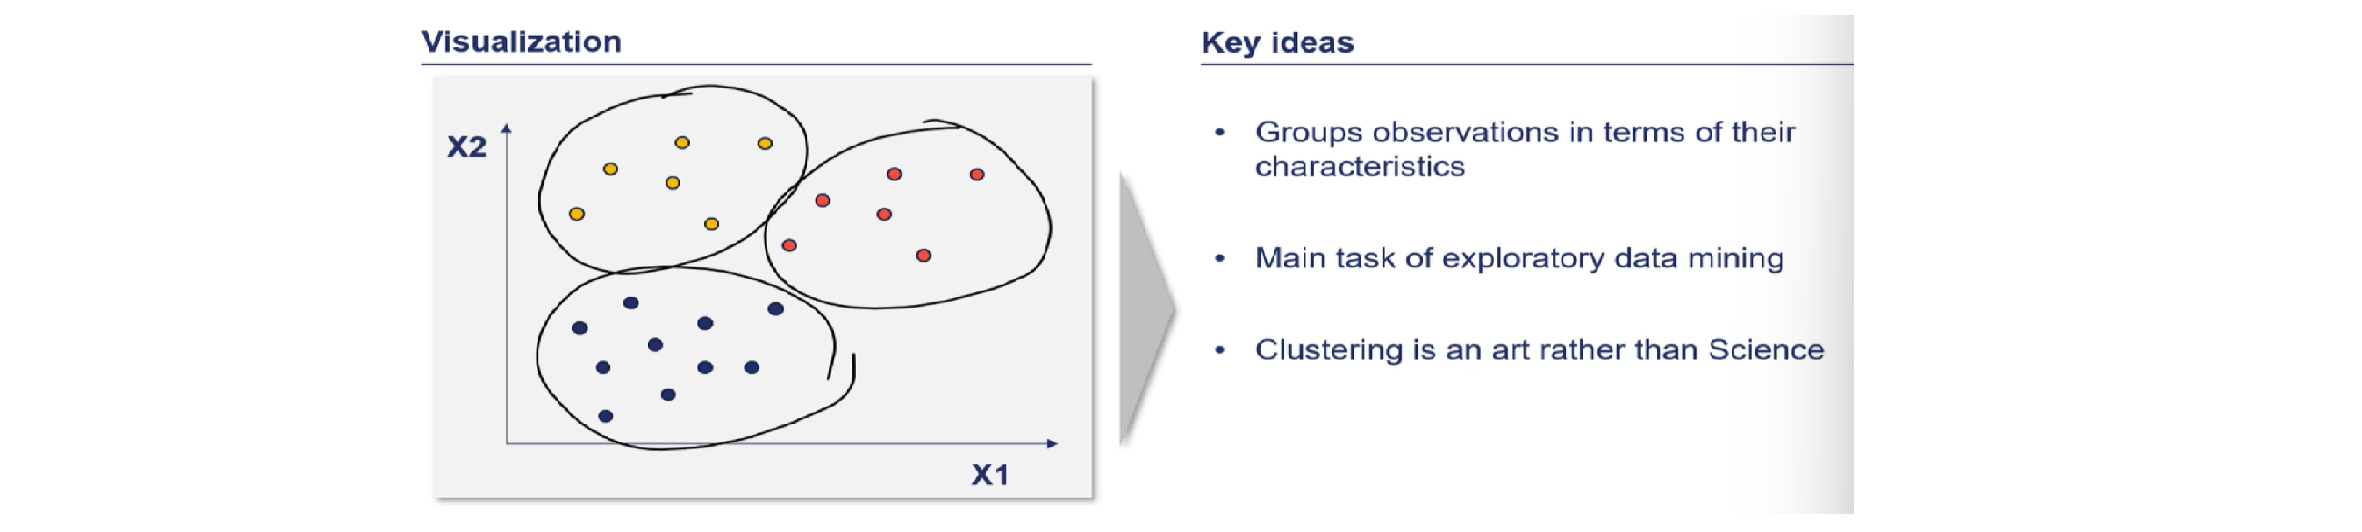

In the following example you have socio-economic data about countries: GDP per capita, exports and so on. We are going to segment the countries based on those characteristics.

**Steps:**
1. Find optimal number of clusters: use AIC (Akaike's Information Criterion) and BIC (Bayasian Information Criterion). Trade-off between simplicity and goodness fit. You prefer a lower AIC/BI. Be careful with overfitting and underfiting.
2. Visualize optimal number os clusters 
3. Create clusters
4. Interpret the clusters

# Libraries and data

In [1]:
%cd C:\Users\jilli\Desktop\PROJECTS\5_DATA_MINING\Data Mining for Business in Python-20221025T033547Z-001\Data Mining for Business in Python\4. Clustering - Gaussian Mixture Model

C:\Users\jilli\Desktop\PROJECTS\5_DATA_MINING\Data Mining for Business in Python-20221025T033547Z-001\Data Mining for Business in Python\4. Clustering - Gaussian Mixture Model


In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [3]:
#loading the data
data = pd.read_csv("Country-data.csv")
data.head(1)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553


In [ ]:
dataset = data.iloc[:, 1:] # drop firs column "country"
dataset.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Clustering

Text(0.5, 0, 'number of components')

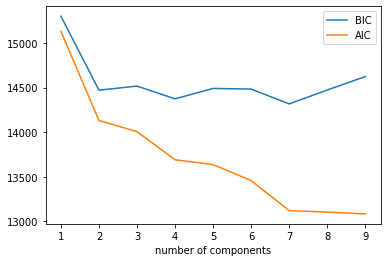

In [ ]:
#finding optimal number of cluster
n_components = np.arange(1,10)
models = [GaussianMixture(n, 
                          random_state = 1502).fit(dataset) #random_state = set same result
          for n in n_components]
plt.plot(n_components,
         [m.bic(dataset) for m in models],
         label = 'BIC')
plt.plot(n_components,
         [m.aic(dataset) for m in models],
         label = 'AIC')
plt.legend()
plt.xlabel('number of components')
#you prefer the lower numbers until it stabilize (AIS on 7 and BIC on 2... we can try 2,4 and 7 clusteres and see which has the best story)

In [ ]:
#GMM
model = GaussianMixture(n_components = 4, 
                        random_state = 1502).fit(dataset)

# Interpretation

In [ ]:
#Predicting cluster by country
cluster = pd.Series(model.predict(dataset))
cluster[:3]

0    0
1    1
2    1
dtype: int64

In [ ]:
#assign a cluster in the dataframe
data['Cluster'] = cluster
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,0,1,2,3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,1.00,0.00,0.0,0.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0.47,0.53,0.0,0.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0.09,0.91,0.0,0.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,1.00,0.00,0.0,0.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0.00,1.00,0.0,0.0


In [ ]:
#searching a specific country
data.loc[data['country'] == 'Portugal']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,0,1,2,3
122,Portugal,3.9,29.9,11.0,37.4,27200,0.643,79.8,1.39,22500,2,0.0,0.0,1.0,0.0


In [ ]:
#Create the probabilities of belonging to any cluster
probabilities = round(pd.DataFrame(model.predict_proba(dataset)),2)
probabilities.head(2)

,0,1,2,3
0,1.00,0.00,0.0,0.0
1,0.47,0.53,0.0,0.0


In [ ]:
#joining probabilities with data
data = pd.concat([data, probabilities], axis = 1)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,0,1,2,3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,1.00,0.00,0.0,0.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0.47,0.53,0.0,0.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0.09,0.91,0.0,0.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,1.00,0.00,0.0,0.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0.00,1.00,0.0,0.0


In [ ]:
#interpreting the cluster (means of the model)
interpretation = pd.DataFrame(model.means_,
                              columns = list(dataset.columns))
interpretation
# the mean of child_mort in cluster 1 is 63 ...

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,63.722474,31.778417,6.264790,45.308663,4913.809381,9.863647,64.428691,3.902065,2248.625321
1,16.050529,48.084698,6.407898,49.131804,18747.283556,7.375799,74.784760,2.093548,10878.569213
2,4.823374,50.845081,9.206409,45.417744,42898.898956,2.499032,80.368767,1.720567,40168.111472
3,4.875000,85.250000,7.640000,61.900000,83625.000000,4.216750,81.000000,1.792500,84425.000000


In [ ]:
data[data[3] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,0,1,2,3
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3,0.0,0.0,0.0,1.0
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,3,0.0,0.0,0.0,1.0
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,3,0.0,0.0,0.0,1.0
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,3,0.0,0.0,0.0,1.0
